## Library Imports

In [39]:
library(glue)
library(DAAG)

options(repr.plot.width=10, repr.plot.height=5)

set.seed(20)
options(warn=-1)

### Question 7.1

**Describe a situation or problem from your job, everyday life, current events, etc., for which exponential
smoothing would be appropriate. What data would you need? Would you expect the value of α (the
first smoothing parameter) to be closer to 0 or 1, and why?**

**ANSWER:**
The first that comes to mind when thinking of exponential smoothing and its uses for short-term forecasting is the stock market. Nowadays, there are numerous firms that try to use machine learning/AI to predict the prices of stocks in order to make lots of profit.

The data I would need is stock price data in minute or maybe even second intervals. Seeing as how volatile stock prices are, I would say the alpha value would be near 1 so a lot of weight would be placed on the true current observation and little weight on the previous observation.

### Question 7.2
**Using the 20 years of daily high temperature data for Atlanta (July through October) from Question 6.2
(file temps.txt), build and use an exponential smoothing model to help make a judgment of whether
the unofficial end of summer has gotten later over the 20 years. (Part of the point of this assignment is
for you to think about how you might use exponential smoothing to answer this question. Feel free to
combine it with other models if you’d like to. There’s certainly more than one reasonable approach.)
Note: in R, you can use either HoltWinters (simpler to use) or the smooth package’s es function
(harder to use, but more general). If you use es, the Holt-Winters model uses model=”AAM” in the
function call (the first and second constants are used “A”dditively, and the third (seasonality) is used
“M”ultiplicatively; the documentation doesn’t make that clear).**

In [91]:
temp_data <- read.table('../data/7.2tempsSummer2018.txt', sep='', header=TRUE)

temp_data$datetime <- as.Date(temp_data$DAY, format = "%d-%b")

In [92]:
head(temp_data)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,⋯,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,datetime
1-Jul,98,86,91,84,89,84,90,73,82,⋯,95,85,95,87,92,105,82,90,85,2018-07-01
2-Jul,97,90,88,82,91,87,90,81,81,⋯,85,87,90,84,94,93,85,93,87,2018-07-02
3-Jul,97,93,91,87,93,87,87,87,86,⋯,82,91,89,83,95,99,76,87,79,2018-07-03
4-Jul,90,91,91,88,95,84,89,86,88,⋯,86,90,91,85,92,98,77,84,85,2018-07-04
5-Jul,89,84,91,90,96,86,93,80,90,⋯,88,88,80,88,90,100,83,86,84,2018-07-05
6-Jul,93,84,89,91,96,87,93,84,90,⋯,87,82,87,89,90,98,83,87,84,2018-07-06


In [110]:
data_jul1  <- ts(temp_data[1,c(2:20)], frequency=18)

In [111]:
data_jul1

X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014
98,86,91,84,89,84,90,73,82,91,93,95,85,95,87,92,105,82,90


In [112]:
hw <- HoltWinters(data_jul1)
plot(hw)

ERROR: Error in decompose(ts(x[1L:wind], start = start(x), frequency = f), seasonal): time series has no or less than 2 periods


### Question 8.1
**Describe a situation or problem from your job, everyday life, current events, etc., for which a linear
regression model would be appropriate. List some (up to 5) predictors that you might use.**

**ANSWER:**

Linear regression is useful when predicting house prices. Especially in the Bay Area where the housing market is so high, its important to be able to accurately predict the housing price so that you don't overpay on an already ridiculously highly priced house. 

5 predictors to use:
1. Square footage
2. Distance of bus stop or subway stations
3. Year it was built
4. Number of bedrooms
5. Number of bathrooms

### Question 8.2
**Using crime data from http://www.statsci.org/data/general/uscrime.txt (file uscrime.txt,
description at http://www.statsci.org/data/general/uscrime.html ), use regression (a useful R function is
lm or glm) to predict the observed crime rate in a city with the following data:**

- M = 14.0
- So = 0
- Ed = 10.0
- Po1 = 12.0
- Po2 = 15.5
- LF = 0.640
- M.F = 94.0
- Pop = 150
- NW = 1.1
- U1 = 0.120
- U2 = 3.6
- Wealth = 3200
- Ineq = 20.1
- Prob = 0.04
- Time = 39.0

**Show your model (factors used and their coefficients), the software output, and the quality of fit.
Note that because there are only 47 data points and 15 predictors, you’ll probably notice some
overfitting. We’ll see ways of dealing with this sort of problem later in the course.**

In [2]:
crime_data <- read.table('../data/5.1uscrimeSummer2018.txt', sep='', header=TRUE)

In [44]:
M  <-  14.0
So <- 0
Ed <- 10.0
Po1 <- 12.0
Po2 <- 15.5
LF <- 0.640
M.F <- 94.0
Pop <- 150
NW <- 1.1
U1 <- 0.120
U2 <- 3.6
Wealth <- 3200
Ineq <- 20.1
Prob <- 0.04
Time <- 39.0

sample_data <- data.frame(M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time)

Use cross-validation to determine the root mean squared error (RMSE) and the mean absolute error (MAE) for each fold in the cross-validation step.

In [17]:
# RMSE function
rmse <- function(resids) {
    sqrt(mean(resids^2))
}
# MAE function
mae <- function(resids) {
    mean(abs(resids))
}

In [51]:
# Shuffle data
shuffled_df <- crime_data[sample(nrow(crime_data)), ]

# 5 fold split
folds <- cut(seq(1, nrow(crime_data)), breaks=5, labels=FALSE)

# For each fold, train and test on Linear Regression algorithm
resids <- c(1:nrow(crime_data))
preds <- c(1:nrow(crime_data))
for (i in 1:5) {
    print(glue("Iteration #{i}"))
    test_indices <- which(folds==i, arr.ind=TRUE)
    test_data <- crime_data[test_indices, ]
    train_data <- crime_data[-test_indices, ]

    temp_fit <- lm(formula=Crime ~., data=train_data)
    print(summary(temp_fit))
    
    # Perform prediction step on test data since model was fit using the training data
    preds[test_indices] <- predict(temp_fit, test_data)    
    resids[test_indices] <- test_data$Crime - preds[test_indices]
}

overall_rmse <- round(rmse(resids), 3)
overall_mae <- round(mae(resids), 3)

print(glue("RMSE: {overall_rmse}"))
print(glue("MAE: {overall_mae}"))

Iteration #1

Call:
lm(formula = Crime ~ ., data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-354.9  -86.4   -4.8   77.4  467.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -6104.930   2068.731   -2.95   0.0076 **
M             102.276     60.149    1.70   0.1038   
So           -114.292    195.735   -0.58   0.5655   
Ed            120.169     77.242    1.56   0.1347   
Po1           174.303    118.646    1.47   0.1566   
Po2          -112.927    131.682   -0.86   0.4008   
LF           -764.520   1700.030   -0.45   0.6575   
M.F            15.968     24.560    0.65   0.5226   
Pop            -1.250      1.657   -0.75   0.4592   
NW              4.366      7.961    0.55   0.5892   
U1          -5307.262   5371.917   -0.99   0.3344   
U2            148.800    103.301    1.44   0.1645   
Wealth          0.260      0.149    1.74   0.0967 . 
Ineq           77.456     28.898    2.68   0.0140 * 
Prob        -3938.111   2897.333   -1.36   

I also want to see the residual plot as well for the predicted values.

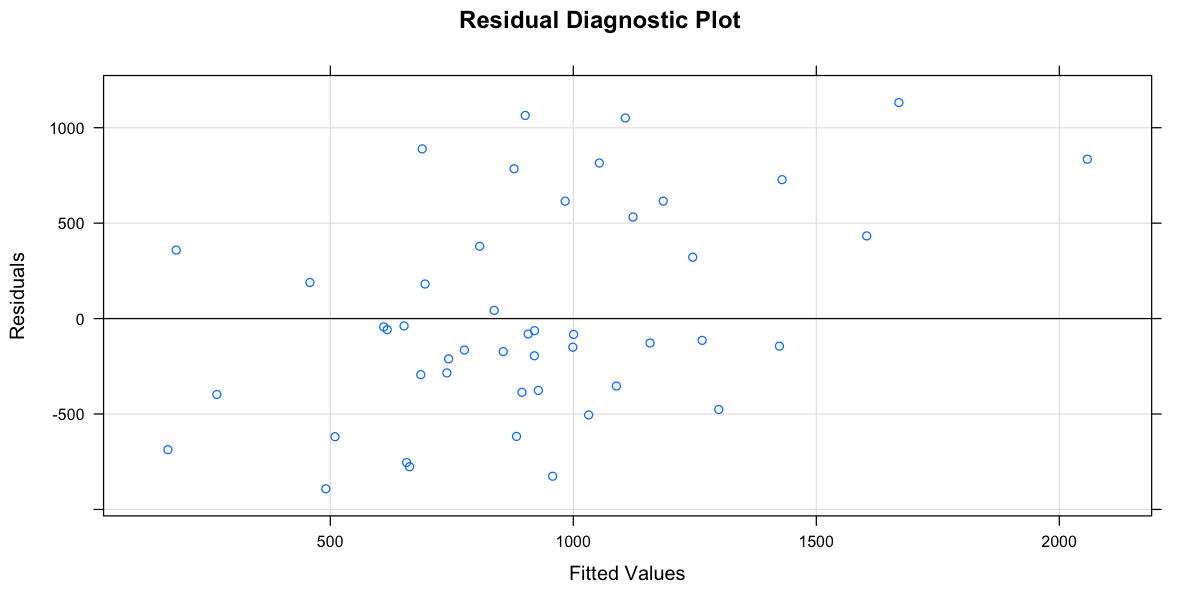

In [36]:
xyplot(resids ~ preds,
  xlab = "Fitted Values",
  ylab = "Residuals",
  main = "Residual Diagnostic Plot",
  panel = function(x, y, ...)
  {
    panel.grid(h = -1, v = -1)
    panel.abline(h = 0)
    panel.xyplot(x, y, ...)
  }
)

From the summary of the models above, it seems that the features that seemed most useful were Ineq, Ed, M, Po1, U2, Prob, and Time. Using this subset of predictors, I'll build another linear regression model.

In [56]:
# Shuffle data
shuffled_df <- crime_data[sample(nrow(crime_data)), ]

# 5 fold split
folds <- cut(seq(1, nrow(crime_data)), breaks=5, labels=FALSE)

# For each fold, train and test on Linear Regression algorithm
resids <- c(1:nrow(crime_data))
preds <- c(1:nrow(crime_data))
for (i in 1:5) {
    print(glue("Iteration #{i}"))
    test_indices <- which(folds==i, arr.ind=TRUE)
    test_data <- crime_data[test_indices, ]
    train_data <- crime_data[-test_indices, ]

    temp_fit <- lm(formula=Crime ~ M + Ed + Po1 + U2 + Ineq + Prob + Time, data=train_data)
    print(summary(temp_fit))
    
    # Perform prediction step on test data since model was fit using the training data
    preds[test_indices] <- predict(temp_fit, test_data)    
    resids[test_indices] <- test_data$Crime - preds[test_indices]
}

overall_rmse <- round(rmse(resids), 3)
overall_mae <- round(mae(resids), 3)

print(glue("RMSE: {overall_rmse}"))
print(glue("MAE: {overall_mae}"))

Iteration #1

Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob + Time, 
    data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-463.4 -113.9    0.6   68.6  593.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4568.59    1241.74   -3.68  0.00095 ***
M             106.72      38.89    2.74  0.01030 *  
Ed            176.51      59.75    2.95  0.00616 ** 
Po1           109.05      16.90    6.45  4.7e-07 ***
U2             81.04      48.03    1.69  0.10229    
Ineq           58.29      17.06    3.42  0.00189 ** 
Prob        -4109.26    2127.57   -1.93  0.06325 .  
Time           -1.31       6.20   -0.21  0.83389    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 215 on 29 degrees of freedom
Multiple R-squared:  0.692,	Adjusted R-squared:  0.618 
F-statistic: 9.33 on 7 and 29 DF,  p-value: 5.15e-06

Iteration #2

Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob + Time, 
    d

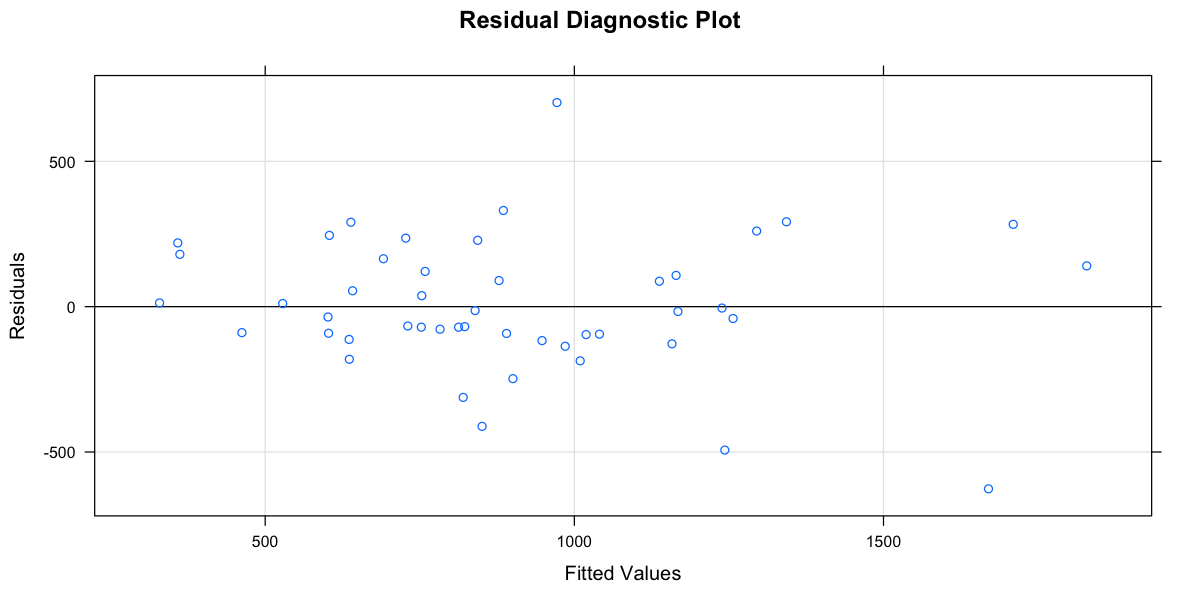

In [57]:
xyplot(resids ~ preds,
  xlab = "Fitted Values",
  ylab = "Residuals",
  main = "Residual Diagnostic Plot",
  panel = function(x, y, ...)
  {
    panel.grid(h = -1, v = -1)
    panel.abline(h = 0)
    panel.xyplot(x, y, ...)
  }
)

The second model with the subset of predictors worked the better than the model built on all the predictors. RMSE reduced from 289.558 to 227.23 and MAE reducted from 221.229 to 169.714.

So, now the final model using all available data will be built using the formula below: 

Crime ~ M + Ed + Po1 + U2 + Ineq + Prob + Time


In [61]:
final_model <- lm(formula=Crime ~ M + Ed + Po1 + U2 + Ineq + Prob + Time, data=crime_data)

sample_prediction <- round(predict(final_model, sample_data), 3)

print(glue("Prediction for the crime rate for the sample data is {sample_prediction}"))
print("Final Model")
print(summary(final_model))

Prediction for the crime rate for the sample data is 1285.283
[1] "Final Model"

Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob + Time, 
    data = crime_data)

Residuals:
   Min     1Q Median     3Q    Max 
-480.9  -89.1   -6.6  140.3  576.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4911.09     960.73   -5.11  8.8e-06 ***
M             106.66      33.88    3.15  0.00314 ** 
Ed            189.41      48.29    3.92  0.00035 ***
Po1           115.70      13.99    8.27  4.2e-10 ***
U2             88.72      41.36    2.14  0.03825 *  
Ineq           67.73      14.08    4.81  2.3e-05 ***
Prob        -4249.76    1880.67   -2.26  0.02950 *  
Time           -2.31       5.54   -0.42  0.67881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 203 on 39 degrees of freedom
Multiple R-squared:  0.767,	Adjusted R-squared:  0.725 
F-statistic: 18.3 on 7 and 39 DF,  p-value: 1.55e-10

